<a href="https://colab.research.google.com/github/victorhgalves/financialanalytics/blob/master/Financial_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   datetime import datetime
from   statsmodels.tsa.arima_model import ARIMA
from   pandas_datareader import data

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
start_date = '2016-01-01'
end_date   = '2016-12-31'
df = data.DataReader('PETR4.SA', 'yahoo', start_date, end_date)

In [ ]:
df.reset_index(inplace= True)

In [ ]:
df.shape

(249, 7)

In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-01-04,7.03,6.55,6.57,6.87,45962100,6.373444
1,2016-01-05,7.00,6.62,6.92,6.68,29446700,6.197176
2,2016-01-06,6.54,6.40,6.53,6.40,67507200,5.937414
3,2016-01-07,6.43,6.08,6.19,6.26,57387900,5.807534
4,2016-01-08,6.45,6.13,6.38,6.27,52100300,5.816810


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       249 non-null    datetime64[ns]
 1   High       249 non-null    float64       
 2   Low        249 non-null    float64       
 3   Open       249 non-null    float64       
 4   Close      249 non-null    float64       
 5   Volume     249 non-null    int64         
 6   Adj Close  249 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.7 KB


In [ ]:
#Variavel de variancia entre abertura e fechamento do ativo no dia.
df['Variance'] = df['Close'] - df['Open']

In [ ]:
#Separação do período do mês para analise.
labels = ['Inicio','Meio','Fim']
df['Period Month'] = pd.cut(df['Date'].dt.day, bins=3, labels=labels)

In [ ]:
#Separação do período do ano por mês para analise
labels = ['Inicio','Meio','Fim']
df['Period Year'] = pd.cut(df['Date'].dt.month, bins=3, labels=labels)

In [ ]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,Variance
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02,249.000000,249.000000
mean,11.001044,10.552851,10.785341,10.772610,5.744280e+07,9.993977,-0.012731
std,3.832798,3.752389,3.806743,3.792668,2.583240e+07,3.518538,0.325701
min,4.270000,4.120000,4.200000,4.200000,3.248000e+05,3.896428,-1.600000
25%,8.340000,8.030000,8.150000,8.230000,4.364590e+07,7.635143,-0.190000
50%,10.360000,9.850000,10.230000,10.210000,5.369200e+07,9.472032,0.009999
75%,14.020000,13.620000,13.890000,13.980000,6.981870e+07,12.969539,0.150001
max,18.490000,18.090000,18.260000,18.200001,1.867725e+08,16.884525,0.799999


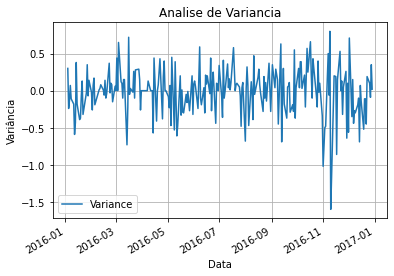

In [ ]:
df.plot(x='Date', y='Variance',grid = True)
plt.xlabel('Data')
plt.ylabel('Variância')
plt.title('Analise de Variancia')
plt.show()

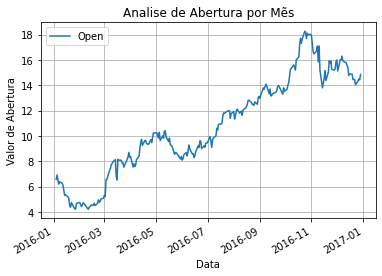

In [ ]:
df.plot(x='Date', y='Open',grid = True)
plt.xlabel('Data')
plt.ylabel('Valor de Abertura')
plt.title('Analise de Abertura por Mẽs')
plt.show()

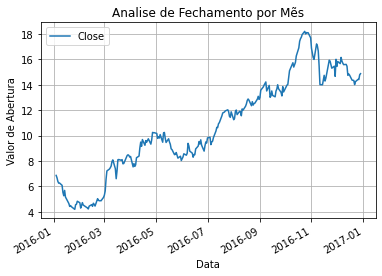

In [ ]:
df.plot(x='Date', y='Close',grid = True)
plt.xlabel('Data')
plt.ylabel('Valor de Abertura')
plt.title('Analise de Fechamento por Mẽs')
plt.show()

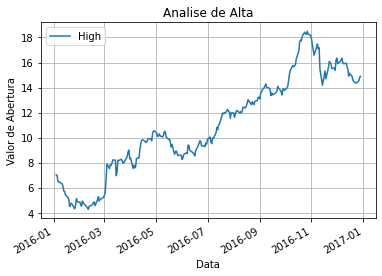

In [ ]:
df.plot(x='Date', y='High',grid = True)
plt.xlabel('Data')
plt.ylabel('Valor de Abertura')
plt.title('Analise de Alta')
plt.show()

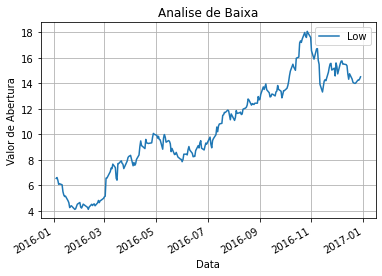

In [ ]:
df.plot(x='Date', y='Low',grid = True)
plt.xlabel('Data')
plt.ylabel('Valor de Abertura')
plt.title('Analise de Baixa')
plt.show()

In [ ]:
df.corr()

,High,Low,Open,Close,Volume,Adj Close,Variance
High,1.000000,0.998051,0.998739,0.998071,-0.242104,0.998071,-0.050932
Low,0.998051,1.000000,0.998215,0.998562,-0.280535,0.998562,-0.039097
Open,0.998739,0.998215,1.000000,0.996333,-0.261821,0.996333,-0.085913
Close,0.998071,0.998562,0.996333,1.000000,-0.260767,1.000000,-0.000356
Volume,-0.242104,-0.280535,-0.261821,-0.260767,1.000000,-0.260767,0.023591
Adj Close,0.998071,0.998562,0.996333,1.000000,-0.260767,1.000000,-0.000356
Variance,-0.050932,-0.039097,-0.085913,-0.000356,0.023591,-0.000356,1.000000


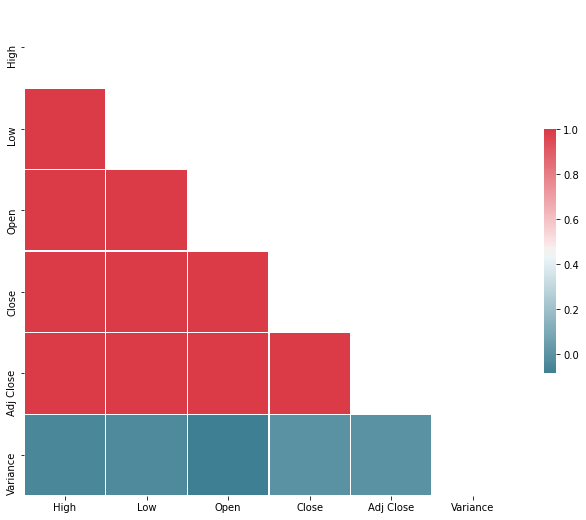

In [ ]:
fig, ax = plt.subplots(figsize=(11, 9))

corr = df.select_dtypes(include=['float64']).corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
#Verificando qual o mês com maior fechamento.
top_month_close = df.nlargest(3, columns='Close')['Date'].dt.month
top_month_close.reset_index().iloc[:,1:]

,Date
0,10
1,10
2,10


In [ ]:
#Verificando qual o mês com maior volume.
top_month_volume = df.nlargest(3, columns='Volume')['Date'].dt.month
top_month_volume.reset_index().iloc[:,1:]

,Date
0,3
1,3
2,3


In [ ]:
#Verificando qual periodo do mês com maior alta na abertura.
top_period_month_open = df.nlargest(3, columns='Open')['Period Month']
top_period_month_open.reset_index().iloc[:,1:]

,Period Month
0,Fim
1,Fim
2,Fim


In [ ]:
#Verificando qual periodo do mês com maior alta no fechamento.
top_period_month_close = df.nlargest(3, columns='Close')['Period Month']
top_period_month_close.reset_index().iloc[:,1:]

,Period Month
0,Fim
1,Fim
2,Fim


In [ ]:
#Verificando qual periodo do mês com maior volume.
top_period_month_high = df.nlargest(3, columns='Volume')['Period Month']
top_period_month_high.reset_index().iloc[:,1:]

,Period Month
0,Inicio
1,Inicio
2,Inicio


In [ ]:
#Verificando qual periodo do ano com maior volume.
top_period_year_high = df.nlargest(3, columns='Volume')['Period Year']
top_period_year_high.reset_index().iloc[:,1:]

,Period Year
0,Inicio
1,Inicio
2,Inicio


Esse é um projeto bem básico de análise exploratoria, com foco em analisar um ativo específico da bolsa de valores brasileira. Eu utilizei um dataset vindo da API do Yahoo Finanças no período de 2016, levantei alguns insights em relação as variávies e também criei algumas para auxiliar na minhas explorações que eu acreditei que seriam válidas.

Retirei alguns insights que podem auxiliar como período do ano com maior alta/baixa, períodos do mês com maior alta/baixa, relação de volume/preço.

Com essa informações que são apenas de estudo e de um ativo em questão podemos entender como esse átivo se movimentou no ano de 2016, e podemos prever ou até entender se esse é um padrão, claro que precisaria fazer mais análises e também comparar anos, mas fica uma dica. 